In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
import plotly.graph_objects as go

In [3]:
# set number of columns in  pandas output
pd.set_option('display.max_columns', 100)

Data obtained from https://cancer.sanger.ac.uk/cosmic/download/cancer-mutation-census/v99/alldata-cmc under "Cancer Mutation Census". Downloaded CancerMutationCensus_AllData_Tsv_v99_GRCh37.tar

In [4]:
# df = pd.read_csv('cmc_export.tsv', sep='\t', nrows=100) # read first 100 rows
df = pd.read_csv('cmc_export.tsv', sep='\t', usecols=['GENE_NAME', 'ONC_TSG','AA_MUT_START', 'AA_MUT_STOP', 'AA_WT_ALLELE_SEQ', 'AA_MUT_ALLELE_SEQ', 'Mutation AA', 'Mutation Description AA', 'MUTATION_SIGNIFICANCE_TIER'])
df

C:\Users\liyoa\AppData\Local\Temp\ipykernel_32648\2720823258.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cmc_export.tsv', sep='\t', usecols=['GENE_NAME', 'ONC_TSG','AA_MUT_START', 'AA_MUT_STOP', 'AA_WT_ALLELE_SEQ', 'AA_MUT_ALLELE_SEQ', 'Mutation AA', 'Mutation Description AA', 'MUTATION_SIGNIFICANCE_TIER'])


,GENE_NAME,ONC_TSG,Mutation AA,AA_MUT_START,AA_MUT_STOP,AA_WT_ALLELE_SEQ,AA_MUT_ALLELE_SEQ,Mutation Description AA,MUTATION_SIGNIFICANCE_TIER
0,PODN,NaN,p.N296K,296,296,N,K,Substitution - Missense,Other
1,PODN,NaN,p.R211C,211,211,R,C,Substitution - Missense,Other
2,PODN,NaN,p.L312=,312,312,L,L,Substitution - coding silent,Other
3,PODN,NaN,p.I380Sfs*55,380,380,I,SAAWSTCCCTATSCGSRASTHWPSRASSGCTRCTCTTTRWSACPVA...,Deletion - Frameshift,Other
4,PODN,NaN,p.V412M,412,412,V,M,Substitution - Missense,Other
...,...,...,...,...,...,...,...,...,...
5225809,AC011308.1,NaN,p.G9D,9,9,G,D,Substitution - Missense,Other
5225810,RPS17L,NaN,p.E75G,75,75,E,G,Substitution - Missense,Other
5225811,RPS17L,NaN,p.R81S,81,81,R,S,Substitution - Missense,Other
5225812,FKSG68,NaN,p.Q74R,74,74,Q,R,Substitution - Missense,Other


Only focusing on single amino acid mutations...

In [5]:
df[(df['GENE_NAME']=="TP53") & (df['Mutation AA']=="p.R280K")]

,GENE_NAME,ONC_TSG,Mutation AA,AA_MUT_START,AA_MUT_STOP,AA_WT_ALLELE_SEQ,AA_MUT_ALLELE_SEQ,Mutation Description AA,MUTATION_SIGNIFICANCE_TIER
3012964,TP53,"oncogene, TSG, fusion",p.R280K,280,280,R,K,Substitution - Missense,3


In [6]:
df['ONC_TSG'].unique()

array([nan, 'TSG, fusion', 'oncogene, TSG', 'oncogene', 'TSG',
       'oncogene, fusion', 'fusion', 'oncogene, TSG, fusion'],
      dtype=object)

In [7]:
df['Mutation Description AA'].unique()

array(['Substitution - Missense', 'Substitution - coding silent',
       'Deletion - Frameshift', 'Substitution - Nonsense',
       'Deletion - In frame', 'Insertion - In frame',
       'Insertion - Frameshift', nan, 'Nonstop extension',
       'Complex - frameshift', 'Complex - deletion inframe', 'Frameshift',
       'Complex - insertion inframe'], dtype=object)

In [8]:
# all_mutations = pd.DataFrame()

# df = df[(df['GENE_NAME'].isin(['KRAS', 'TP53', 'HRAS', 'EGFR'])) & \
# (df['AA_MUT_START'] == df['AA_MUT_STOP'])]
df = df[(df['AA_MUT_START'] == df['AA_MUT_STOP'])]
df = df[['GENE_NAME' ,'ONC_TSG', 'AA_MUT_START', 'AA_WT_ALLELE_SEQ', 'AA_MUT_ALLELE_SEQ', 'Mutation AA', 'Mutation Description AA', 'MUTATION_SIGNIFICANCE_TIER']].sort_values(by='AA_MUT_START')

# mutation not nan in AA_WT_ALLELE_SEQ	Mutation AA	Mutation Description AA
df = df.dropna(subset=['AA_WT_ALLELE_SEQ', 'Mutation AA', 'Mutation Description AA'])
df


,GENE_NAME,ONC_TSG,AA_MUT_START,AA_WT_ALLELE_SEQ,AA_MUT_ALLELE_SEQ,Mutation AA,Mutation Description AA,MUTATION_SIGNIFICANCE_TIER
690904,TCHH,NaN,1,M,NaN,p.M1?,Deletion - Frameshift,Other
1898583,KRTAP4-8,NaN,1,M,NaN,p.M1?,Insertion - Frameshift,Other
4372957,STK11,TSG,1,M,NaN,p.M1?,Frameshift,3
1898799,EFCAB14,NaN,1,M,NaN,p.M1?,Deletion - Frameshift,Other
468978,GATA1,"oncogene, TSG",1,M,NaN,p.M1?,Frameshift,3
...,...,...,...,...,...,...,...,...
3999776,TTN,NaN,35986,I,M,p.I35986M,Substitution - Missense,Other
3983514,TTN,NaN,35989,R,Q,p.R35989Q,Substitution - Missense,Other
3994310,TTN,NaN,35989,R,*,p.R35989*,Substitution - Nonsense,Other
3988412,TTN,NaN,35989,R,R,p.R35989=,Substitution - coding silent,Other


In [9]:
ns_data = pd.read_csv('../lung_cancer/lung_genes_sbna.csv')
# residue_data = residue_data[residue_data['assoc_gene'] == gene]
print(len(ns_data))
ns_data.head()

56754


,gene,pdb_id,chain,sbna_aa3,sbna_num,sbna_aa1,uniprot_num,uniprot_aa,network_score,SecondOrderIntermodularDegree_AVERAGE,NodeEdgeBetweennessSTRIDE_sidechain_MAX,LigandMULTIMERCENTROIDSC_MIN,mutant,mutations,cgc_tier,cancer_role
0,AKT1,2UVM,A,MET,1,M,1,M,-3.289764,-0.887739,-0.599135,1.802890,N,NaN,1,oncogene
1,AKT1,2UVM,A,SER,2,S,2,S,-3.211822,-0.780412,-0.514186,1.917224,N,NaN,1,oncogene
2,AKT1,2UVM,A,ASP,3,D,3,D,-2.323640,-0.348912,-0.599135,1.375593,N,NaN,1,oncogene
3,AKT1,2UVM,A,VAL,4,V,4,V,-1.720478,-0.423430,-0.430810,0.866237,N,NaN,1,oncogene
4,AKT1,2UVM,A,ALA,5,A,5,A,-0.735485,-0.359177,0.880892,1.257200,N,NaN,1,oncogene


In [20]:
# return max value of tiers, in order of '1', '2', '3', 'Other'
def get_tier(tiers):
    if '1' in tiers:
        return '1'
    elif '2' in tiers:
        return '2'
    elif '3' in tiers:
        return '3'
    elif 'Other' in tiers:
        return 'Other'
    else: 
        return None

tmp = (ns_data['gene']+ '|' + ns_data['mutations']).unique()
tier_dict = dict()
for i in tmp.tolist():
    try:
        gene = i.split('|')[0]
        mutations = i.split('|')[1]
        # print(gene, mutations, len(df[(df['GENE_NAME']==gene) & (df['Mutation AA']==mutation)]))
        tiers = []
        for mut in mutations.split(' '):
            # if mut contains a number
            if any(char.isdigit() for char in mut):
                mut = 'p.' + mut.upper().replace(",", "").strip()
                print(mut)
                tiers += list(df[(df['GENE_NAME']==gene) & (df['Mutation AA']==mut)]['MUTATION_SIGNIFICANCE_TIER'].values)
        tier_dict[i] = get_tier(tiers)
    except:
        continue

p.E17K
p.R1275K
p.F1174L
p.2
p.V600E
p.L858R
p.I38M
p.Y602F
p.Y596F
p.Y602F
p.Y596F
p.Y596F
p.Y602F
p.S768G
p.Y596F
p.Y602F
p.S768A
p.K659M
p.C491A
p.C7S
p.C65A
p.C168A
p.C174S
p.C294A
p.G12C
p.G12D
p.G12V
p.L561F
p.S608E
p.S612A
p.S780A
p.W89Y
p.N239Y
p.N235K
p.M133L
p.V203A
p.N239Y
p.G245S
p.N268D
p.R273H
p.R273C
p.R273C
p.T284R
p.V272M
p.R280K


In [21]:
tier_dict

{'AKT1|E17K': '1',
 'ALK|R1275K': None,
 'ALK|F1174L': '1',
 'ALK|yes but is paired with the other 2': None,
 'BRAF|V600E': '1',
 'EGFR|L858R': '1',
 'EML4|I38M': None,
 'EPHA3|Y602F': None,
 'EPHA3|Y596F': None,
 'EPHA3|Y602F, Y596F': None,
 'EPHA3|Y596F, Y602F, S768G': None,
 'EPHA3|Y596F, Y602F, S768A': None,
 'FGFR2|K659M, C491A': None,
 'KIF5B|C7S, C65A, C168A, C174S, C294A': None,
 'KRAS|g12c': '1',
 'KRAS|g12d': '1',
 'KRAS|g12v': '1',
 'RB1|L561F, S608E, S612A, S780A': None,
 'SUB1|W89Y': None,
 'TP53|N239Y': 'Other',
 'TP53|N235K': None,
 'TP53|M133L, V203A, N239Y, G245S, N268D': '2',
 'TP53|R273H': '1',
 'TP53|R273C': '1',
 'TP53|R273C, T284R': '1',
 'TP53|V272M': '2',
 'TP53|R280K': '3'}

In [67]:
df[(df['GENE_NAME']=="TP53") & (df['AA_MUT_START']==284)]


,GENE_NAME,ONC_TSG,AA_MUT_START,AA_WT_ALLELE_SEQ,AA_MUT_ALLELE_SEQ,Mutation AA,Mutation Description AA,MUTATION_SIGNIFICANCE_TIER
3011314,TP53,"oncogene, TSG, fusion",284,T,ISARKGSLTTSCPQGALSEHCPTTPAPLPSQRRNHWMENISPFRSV...,p.T284Ifs*57,Deletion - Frameshift,3
3010436,TP53,"oncogene, TSG, fusion",284,T,ISARKGSLTTSCPQGALSEHCPTTPAPLPSQRRNHWMENISPFRSV...,p.T284Ifs*57,Deletion - Frameshift,3
3010368,TP53,"oncogene, TSG, fusion",284,T,QRKRISARKGSLTTSCPQGALSEHCPTTPAPLPSQRRNHWMENISP...,p.T284Qfs*61,Deletion - Frameshift,3
3010366,TP53,"oncogene, TSG, fusion",284,T,QRKRISARKGSLTTSCPQGALSEHCPTTPAPLPSQRRNHWMENISP...,p.T284Qfs*61,Deletion - Frameshift,3
3010479,TP53,"oncogene, TSG, fusion",284,T,A,p.T284A,Substitution - Missense,Other
3010523,TP53,"oncogene, TSG, fusion",284,T,RESPQERGASPRAAPREH*,p.T284Rfs*19,Deletion - Frameshift,3
3012190,TP53,"oncogene, TSG, fusion",284,T,RGRESPQERGASPRAAPREH*,p.T284Rfs*21,Deletion - Frameshift,3
3011630,TP53,"oncogene, TSG, fusion",284,T,HRGRESPQERGASPRAAPREH*,p.T284Hfs*22,Insertion - Frameshift,3
3009895,TP53,"oncogene, TSG, fusion",284,T,FSARKGSLTTSCPQGALSEHCPTTPAPLPSQRRNHWMENISPFRSV...,p.T284Ffs*57,Complex - frameshift,3
3009958,TP53,"oncogene, TSG, fusion",284,T,T,p.T284=,Substitution - coding silent,Other


In [26]:
tiers = []
for _, row in ns_data.iterrows():
    try:
        comb = row['gene']+ '|' + row['mutations']
    except:
        tiers.append(None)
        continue
    tiers.append(tier_dict[comb])
ns_data['cmc_tier'] = tiers
ns_data

,gene,pdb_id,chain,sbna_aa3,sbna_num,sbna_aa1,uniprot_num,uniprot_aa,network_score,SecondOrderIntermodularDegree_AVERAGE,NodeEdgeBetweennessSTRIDE_sidechain_MAX,LigandMULTIMERCENTROIDSC_MIN,mutant,mutations,cgc_tier,cancer_role,cmc_tier
0,AKT1,2UVM,A,MET,1,M,1,M,-3.289764,-0.887739,-0.599135,1.802890,N,NaN,1,oncogene,None
1,AKT1,2UVM,A,SER,2,S,2,S,-3.211822,-0.780412,-0.514186,1.917224,N,NaN,1,oncogene,None
2,AKT1,2UVM,A,ASP,3,D,3,D,-2.323640,-0.348912,-0.599135,1.375593,N,NaN,1,oncogene,None
3,AKT1,2UVM,A,VAL,4,V,4,V,-1.720478,-0.423430,-0.430810,0.866237,N,NaN,1,oncogene,None
4,AKT1,2UVM,A,ALA,5,A,5,A,-0.735485,-0.359177,0.880892,1.257200,N,NaN,1,oncogene,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56749,TPR,5TVB,B,LEU,138,L,138,L,0.869016,0.553266,1.054734,0.738984,N,NaN,1,fusion,None
56750,TPR,5TVB,B,GLU,139,E,139,E,-1.423048,-0.462926,-0.178021,0.782101,N,NaN,1,fusion,None
56751,TPR,5TVB,B,TYR,140,Y,140,Y,-1.835492,-0.549891,-0.266930,1.018670,N,NaN,1,fusion,None
56752,TPR,5TVB,B,LEU,141,L,141,L,-1.310699,-0.105710,-0.106893,1.098095,N,NaN,1,fusion,None


In [51]:
# not (mutant=Y and cmc_tier=None)
ns_data_filt = ns_data[~((ns_data['mutant']=='Y') & (ns_data['cmc_tier'].isnull()))].reset_index(drop=True)
ns_data_filt

,gene,pdb_id,chain,sbna_aa3,sbna_num,sbna_aa1,uniprot_num,uniprot_aa,network_score,SecondOrderIntermodularDegree_AVERAGE,NodeEdgeBetweennessSTRIDE_sidechain_MAX,LigandMULTIMERCENTROIDSC_MIN,mutant,mutations,cgc_tier,cancer_role,cmc_tier
0,AKT1,2UVM,A,MET,1,M,1,M,-3.289764,-0.887739,-0.599135,1.802890,N,NaN,1,oncogene,None
1,AKT1,2UVM,A,SER,2,S,2,S,-3.211822,-0.780412,-0.514186,1.917224,N,NaN,1,oncogene,None
2,AKT1,2UVM,A,ASP,3,D,3,D,-2.323640,-0.348912,-0.599135,1.375593,N,NaN,1,oncogene,None
3,AKT1,2UVM,A,VAL,4,V,4,V,-1.720478,-0.423430,-0.430810,0.866237,N,NaN,1,oncogene,None
4,AKT1,2UVM,A,ALA,5,A,5,A,-0.735485,-0.359177,0.880892,1.257200,N,NaN,1,oncogene,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47822,TPR,5TVB,B,LEU,138,L,138,L,0.869016,0.553266,1.054734,0.738984,N,NaN,1,fusion,None
47823,TPR,5TVB,B,GLU,139,E,139,E,-1.423048,-0.462926,-0.178021,0.782101,N,NaN,1,fusion,None
47824,TPR,5TVB,B,TYR,140,Y,140,Y,-1.835492,-0.549891,-0.266930,1.018670,N,NaN,1,fusion,None
47825,TPR,5TVB,B,LEU,141,L,141,L,-1.310699,-0.105710,-0.106893,1.098095,N,NaN,1,fusion,None


In [52]:
# fill null values in cmc_tier as unknown
ns_data_filt['cmc_tier'] = ns_data_filt['cmc_tier'].fillna('Unknown').reset_index(drop=True)
ns_data_filt

,gene,pdb_id,chain,sbna_aa3,sbna_num,sbna_aa1,uniprot_num,uniprot_aa,network_score,SecondOrderIntermodularDegree_AVERAGE,NodeEdgeBetweennessSTRIDE_sidechain_MAX,LigandMULTIMERCENTROIDSC_MIN,mutant,mutations,cgc_tier,cancer_role,cmc_tier
0,AKT1,2UVM,A,MET,1,M,1,M,-3.289764,-0.887739,-0.599135,1.802890,N,NaN,1,oncogene,Unknown
1,AKT1,2UVM,A,SER,2,S,2,S,-3.211822,-0.780412,-0.514186,1.917224,N,NaN,1,oncogene,Unknown
2,AKT1,2UVM,A,ASP,3,D,3,D,-2.323640,-0.348912,-0.599135,1.375593,N,NaN,1,oncogene,Unknown
3,AKT1,2UVM,A,VAL,4,V,4,V,-1.720478,-0.423430,-0.430810,0.866237,N,NaN,1,oncogene,Unknown
4,AKT1,2UVM,A,ALA,5,A,5,A,-0.735485,-0.359177,0.880892,1.257200,N,NaN,1,oncogene,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47822,TPR,5TVB,B,LEU,138,L,138,L,0.869016,0.553266,1.054734,0.738984,N,NaN,1,fusion,Unknown
47823,TPR,5TVB,B,GLU,139,E,139,E,-1.423048,-0.462926,-0.178021,0.782101,N,NaN,1,fusion,Unknown
47824,TPR,5TVB,B,TYR,140,Y,140,Y,-1.835492,-0.549891,-0.266930,1.018670,N,NaN,1,fusion,Unknown
47825,TPR,5TVB,B,LEU,141,L,141,L,-1.310699,-0.105710,-0.106893,1.098095,N,NaN,1,fusion,Unknown


In [54]:
ns_data_filt['cmc_tier'].value_counts()

cmc_tier
Unknown    36171
1           8556
2           1552
Other        776
3            772
Name: count, dtype: int64

In [56]:
ns_data_filt.to_csv('lung_genes_sbna_cmc_tier.csv', index=False)

<Axes: xlabel='cmc_tier', ylabel='network_score'>

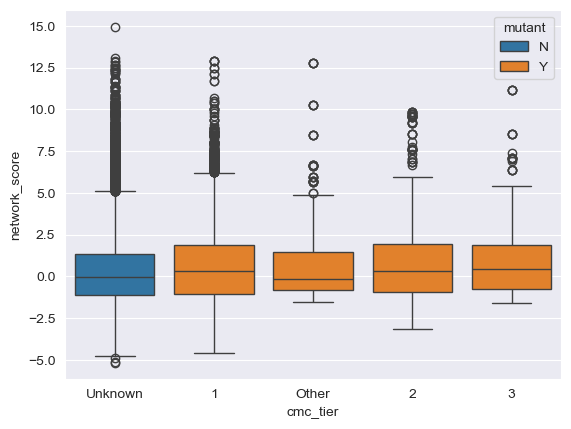

In [55]:
# plot boxplot of network_score  and cmc_tier  coloured by mutant
sns.boxplot(x='cmc_tier', y='network_score', hue='mutant', data=ns_data_filt)

In [93]:
diff_ns = pd.read_csv("../lung_cancer/diff_aas_as_rows.csv")
diff_ns

,gene,cancer_role,cgc_tier,uniprot_num,wt_aa,mut_aa,wt_ns,mut_ns,diff_ns,wt_sd,mut_sd,wt_neb,mut_neb,wt_ld,mut_ld,num_ssm_affected_cases,num_cases_in_gene,ssm_affected_cases_percentage,num_gdc_ssm_affected_cases,num_gdc_ssm_cases,count_TCGA-LUAD,total_TCGA-LUAD,perc_TCGA-LUAD,count_TCGA-LUSC,total_TCGA-LUSC,perc_TCGA-LUSC,count_all_lung,total_all_lung,perc_all_lung,cmc_tier
0,AKT1,oncogene,1,17,E,K,0.217918,0.178303,-0.039615,-0.232960,-0.516073,-0.532687,-0.260502,-0.983564,-0.954878,69,4230,1.63,69,16477,2,559,0.36,0,0,0.00,2,559,0.003578,1
1,ALK,oncogene,1,1275,R,Q,0.656542,4.539066,3.882524,-0.407015,2.126575,0.619538,2.000970,-0.444019,-0.411522,7,3038,0.23,7,16477,0,0,0.00,0,0,0.00,0,0,0.000000,NaN
2,ALK,oncogene,1,1097,C,S,-2.128042,-2.087775,0.040267,-0.866995,-0.949926,-0.384675,-0.454795,0.876372,0.683053,0,0,0.00,0,0,0,0,0.00,0,0,0.00,0,0,0.000000,NaN
3,ALK,oncogene,1,1174,F,L,2.649683,1.324058,-1.325624,0.714982,0.619150,1.521564,-0.173214,-0.413137,-0.878122,5,3038,0.16,5,16477,0,0,0.00,0,0,0.00,0,0,0.000000,1
4,BRAF,oncogene,1,600,V,E,-0.641199,-0.615279,0.025920,-0.482902,-0.870018,-0.234709,0.025865,-0.076412,-0.228874,621,5012,12.39,621,16477,8,559,1.43,0,0,0.00,8,559,0.014311,1
5,EGFR,oncogene,1,858,L,R,1.844056,1.565000,-0.279056,0.380781,-0.005403,0.469010,0.600440,-0.994264,-0.969963,56,4665,1.20,56,16477,22,559,3.94,1,490,0.20,23,1049,0.021926,1
6,EPHA3,NaN,2,596,Y,F,0.413116,0.673248,0.260132,-0.220825,0.153563,0.715225,0.497565,0.081285,-0.022121,0,0,0.00,0,0,0,0,0.00,0,0,0.00,0,0,0.000000,NaN
7,EPHA3,NaN,2,742,Y,F,0.800597,0.907201,0.106604,0.518889,0.868110,0.169191,0.039091,-0.112517,0.000000,0,0,0.00,0,0,0,0,0.00,0,0,0.00,0,0,0.000000,NaN
8,EPHA3,NaN,2,768,S,A,0.342583,-0.323128,-0.665711,0.537894,-0.127337,-0.585787,-0.590651,-0.390476,-0.394860,0,0,0.00,0,0,0,0,0.00,0,0,0.00,0,0,0.000000,NaN
9,EPHA3,NaN,2,608,A,T,-0.465838,-2.022932,-1.557094,-0.363882,-0.871918,-0.191018,-0.603099,-0.089061,0.547915,0,0,0.00,0,0,0,0,0.00,0,0,0.00,0,0,0.000000,NaN


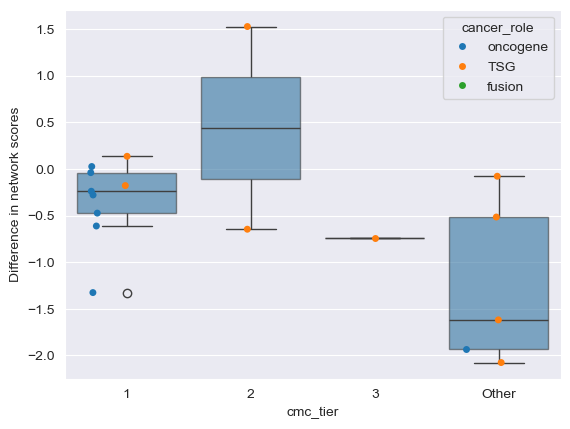

In [95]:
import seaborn as sns
from matplotlib.legend_handler import HandlerTuple

ORDER = ['1', '2', '3', 'Other']

tips = sns.load_dataset("tips")
ax = sns.boxplot(data=diff_ns, x="cmc_tier", y="diff_ns",
                 boxprops={'alpha': 0.6}, order=ORDER)
sns.stripplot(data=diff_ns, x="cmc_tier", y="diff_ns",
              dodge=True, ax=ax, order=ORDER, hue='cancer_role')
handles, labels = ax.get_legend_handles_labels()

plt.ylabel("Difference in network scores")

plt.show()

In [87]:
diff_ns = pd.read_csv("../lung_cancer/diff_aas_pairs.csv")
diff_ns.head()

,gene,uniprot_num,uniprot_aa,sbna_aa1,network_score,SecondOrderIntermodularDegree_AVERAGE,NodeEdgeBetweennessSTRIDE_sidechain_MAX,LigandMULTIMERCENTROIDSC_MIN,cgc_tier,cancer_role,mutant,pair,num_ssm_affected_cases,num_cases_in_gene,ssm_affected_cases_percentage,num_gdc_ssm_affected_cases,num_gdc_ssm_cases,count_TCGA-LUAD,total_TCGA-LUAD,perc_TCGA-LUAD,count_TCGA-LUSC,total_TCGA-LUSC,perc_TCGA-LUSC,count_all_lung,total_all_lung,perc_all_lung,cmc_tier
0,AKT1,17,E,E,0.217918,-0.232960,-0.532687,-0.983564,1,oncogene,False,1,69,4230,1.63,69,16477,2,559,0.36,0,0,0.0,2,559,0.003578,1
1,AKT1,17,E,K,0.178303,-0.516073,-0.260502,-0.954878,1,oncogene,True,1,69,4230,1.63,69,16477,2,559,0.36,0,0,0.0,2,559,0.003578,1
2,ALK,1097,C,C,-2.128042,-0.866995,-0.384675,0.876372,1,oncogene,False,2,0,0,0.00,0,0,0,0,0.00,0,0,0.0,0,0,0.000000,NaN
3,ALK,1097,C,S,-2.087775,-0.949926,-0.454795,0.683053,1,oncogene,True,2,0,0,0.00,0,0,0,0,0.00,0,0,0.0,0,0,0.000000,NaN
4,ALK,1174,F,F,2.649683,0.714982,1.521564,-0.413137,1,oncogene,False,3,5,3038,0.16,5,16477,0,0,0.00,0,0,0.0,0,0,0.000000,1


<Axes: xlabel='cmc_tier', ylabel='network_score'>

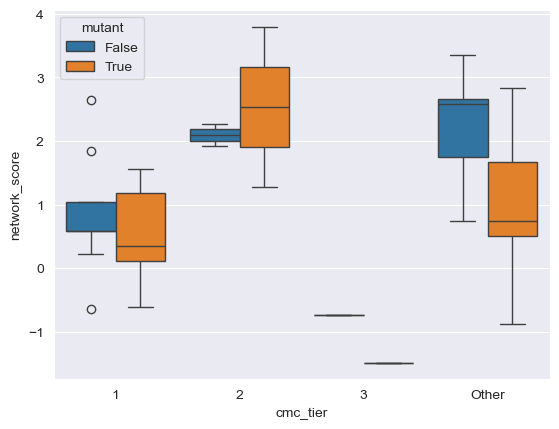

In [91]:
sns.boxplot(data=diff_ns, x="cmc_tier", y="network_score", hue="mutant", order=ORDER)

In [12]:
# merge the two dataframes
tmp = tmp.merge(residue_data, left_on=['GENE_NAME', 'AA_MUT_START'], right_on=['assoc_gene', 'num'], how='left').sort_values(['GENE_NAME', 'AA_MUT_START'])
tmp.head(5)

,GENE_NAME,ONC_TSG,AA_MUT_START,AA_WT_ALLELE_SEQ,AA_MUT_ALLELE_SEQ,Mutation AA,Mutation Description AA,MUTATION_SIGNIFICANCE_TIER,gene_symbol,pdb_id,chain,uniprot_id,assoc_gene,resolution,num,res_code,uniprot_res,network_score,SecondOrderIntermodularDegree_AVERAGE,NodeEdgeBetweennessSTRIDE_sidechain_MAX,LigandMULTIMERCENTROIDSC_MIN,outside_range,residue_match
0,EGFR,oncogene,2,R,Q,p.R2Q,Substitution - Missense,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,EGFR,oncogene,4,S,PGRPGQRSWRCWLRSARRVGLWRKRKFAKARVTSSRSWALLKIIFS...,p.S4Pfs*76,Deletion - Frameshift,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
532,EGFR,oncogene,5,G,A,p.G5A,Substitution - Missense,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3526,EGFR,oncogene,13,A,T,p.A13T,Substitution - Missense,Other,EGFR,3VRP,B,P00533,EGFR,1.52,13.0,E,A,-3.805925,-1.069347,-0.538451,2.198127,True,False
4219,EGFR,oncogene,13,A,E,p.A13E,Substitution - Missense,Other,EGFR,3VRP,B,P00533,EGFR,1.52,13.0,E,A,-3.805925,-1.069347,-0.538451,2.198127,True,False


In [14]:
tmp['ONC_TSG'].unique()

array(['oncogene', 'oncogene, TSG, fusion'], dtype=object)

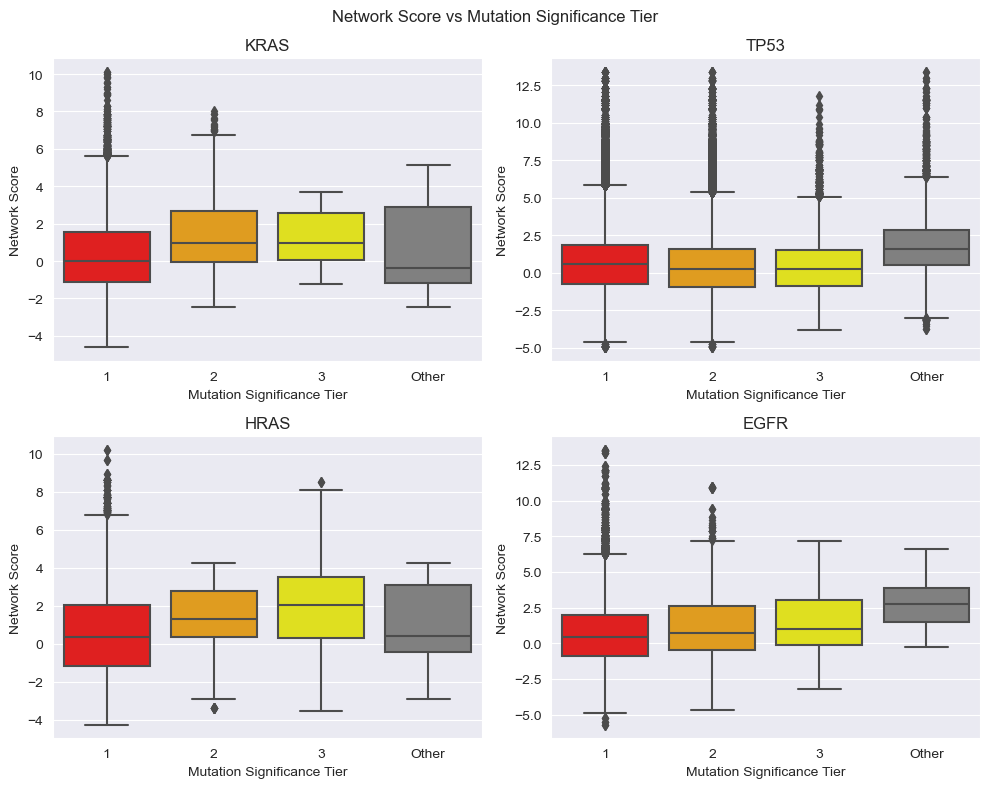

In [67]:
# Define color palette
colors = ['red', 'orange', 'yellow', 'grey']

# Plot boxplots
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
for i, gene in enumerate(['KRAS', 'TP53', 'HRAS', 'EGFR']):
    tmp_gene = tmp[tmp['GENE_NAME'] == gene]
    sns.boxplot(data=tmp_gene, x='MUTATION_SIGNIFICANCE_TIER', y='network_score',ax=ax[i//2, i%2], palette=colors)
    order = ['1', '2', '3', 'Other']
    ax[i//2, i%2].set_xticklabels(order)
    ax[i//2, i%2].set_title(gene)
    ax[i//2, i%2].set_ylabel('Network Score')
    ax[i//2, i%2].set_xlabel('Mutation Significance Tier')

plt.suptitle('Network Score vs Mutation Significance Tier')
plt.tight_layout()
plt.show()

* tier1 median network score around 0 for all 4.
* high network scores more likely to be tier 1 (except for TP53 which has mostly same distribution)